# Numerical Simulations on Jupyter Notebook

## Simulate Pendulum

![pendulum](images/pendulum.svg)

Usually interested in something about the system
* Where will the pendulum be some time later?
* How fast does it go?

Advanced questions
* How long until it stops?
* ...

We'll answer these questions by
* Describing the pendulum using math
* Use python to calculate answers
* Make some cute animations

## Math

There are two forces at play for a simple pendulum (no friction, no air resistance). Gravity and the tension in the string.

![pendulum](images/pendulum_forces.svg)

One of the first things we learn in physics is


\begin{equation}
\sum F = ma
\end{equation}

for reasons outside the scope of the discussion,

\begin{equation}
T = mg cos \theta
\end{equation}
(the pendulum is always a distance L away from fixed point)

That means that we have one unbalanced force,

\begin{equation}
-mgsin\theta = m \frac{d^2 \theta}{dt^2}
\end{equation}

![pendulum](images/pendulum_forces_all.svg)

Equation of motion is 
\begin{equation}
\ddot\theta + \frac{g}{L} sin\theta = 0
\end{equation}

In [2]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi
sqrt = np.sqrt
cos = np.cos
sin = np.sin
gL=9.81/100;

def deriv_z(z, phi):
    u, udot = z
    return [udot, -gL*sin(u)]

def deriv_z_approx(z, phi):
    u, udot = z
    return [udot, -gL*u]

In [3]:
print(cos)

<ufunc 'cos'>


<IPython.core.display.Javascript object>


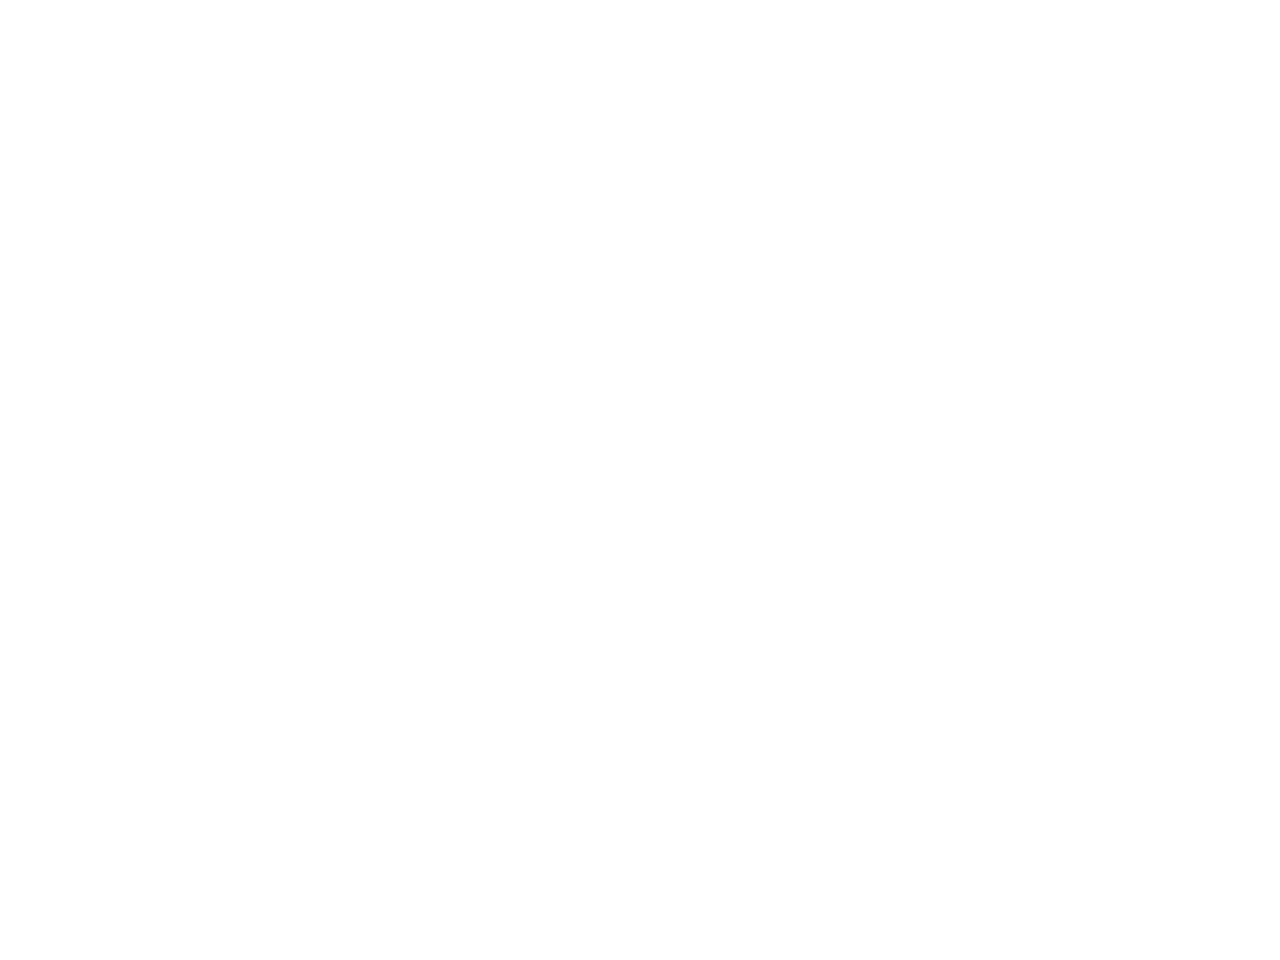

In [4]:
phi = np.linspace(0, 7.0*pi, 2000)
zinit = [0, pi/3]
z = integrate.odeint(deriv_z, zinit, phi)
u, udot = z.T
# plt.plot(phi, u)
fig, ax = plt.subplots()
ax.plot(u, udot)
#ax.set_aspect('equal')
plt.grid(True)
plt.show()

In [5]:
def soln_init(init,deriv_fuc):
    init_position,init_speed=init
    z = integrate.odeint(deriv_z,[init_speed,init_position],phi)
    u,udot=z.T
    return[u,udot]

<IPython.core.display.Javascript object>


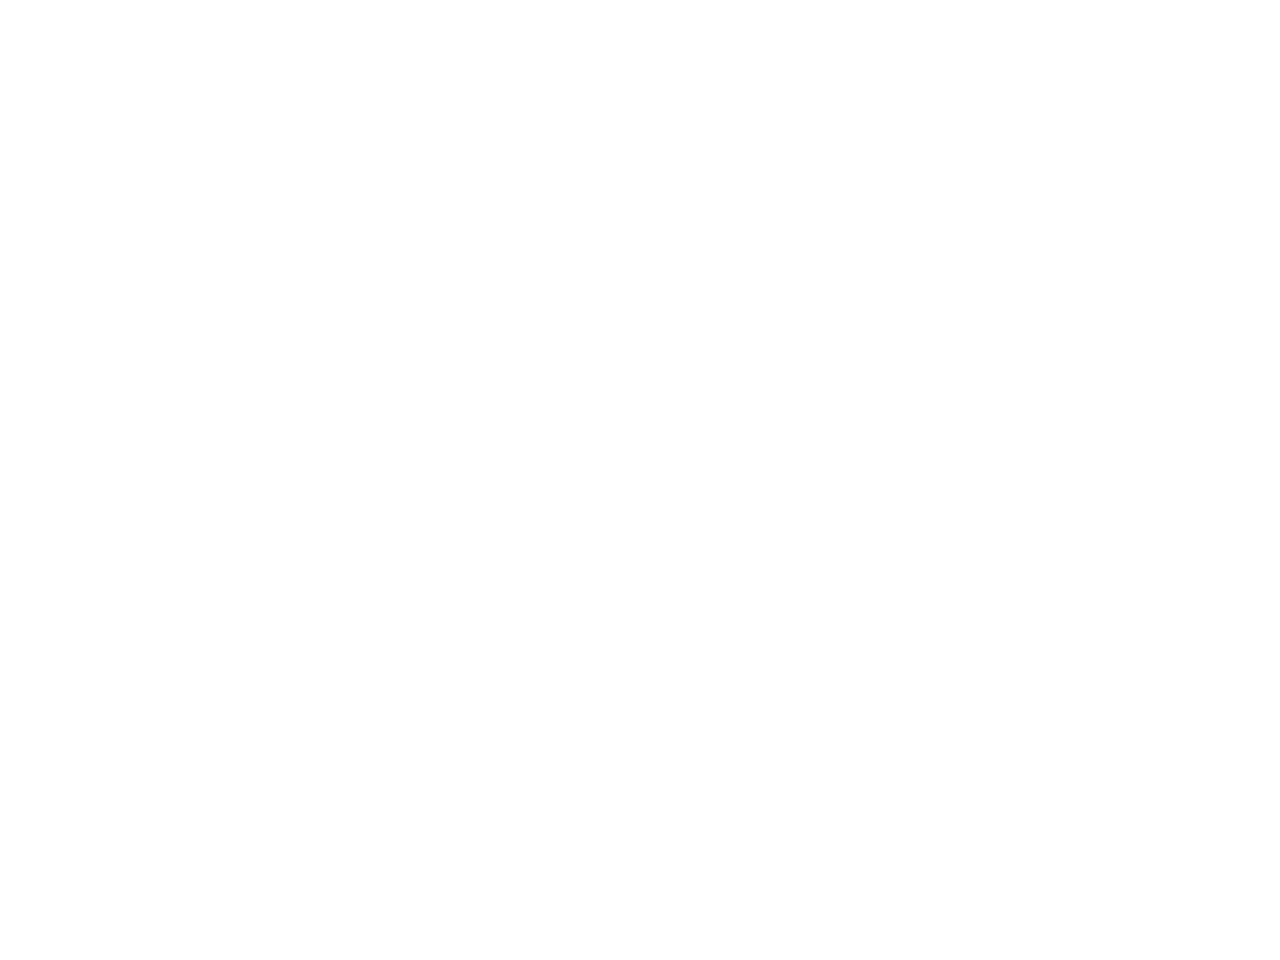

In [6]:
init=[10*pi/180,0]
u,udot=soln_init(init,deriv_z)
u_approx,udot_approx=soln_init(init,deriv_z)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(u, udot)
ax.plot(u_approx, udot_approx)
#ax.set_aspect('equal')
plt.grid(True)
plt.show()

`solve_ivp` method

In [7]:
def deriv_ivp(t,y):
    return    [y[1],-gL*y[0]]
    

In [8]:
def deriv_ivp_approx(t,y):
    return    [y[1],-gL*sin(y[0])]
    

In [9]:
from ipywidgets import *

In [10]:
min_t=0
max_t=70
init_vals=[160*pi/180,0] #inital angular postition and velocity
t=np.linspace(min_t,max_t,2000) # time period of interest

In [11]:
help(integrate.solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the c

In [12]:
sol = integrate.solve_ivp(deriv_ivp,[min_t,max_t],init_vals,t_eval=t)
sol_approx=integrate.solve_ivp(deriv_ivp_approx,[min_t,max_t],init_vals,t_eval=t)

<IPython.core.display.Javascript object>


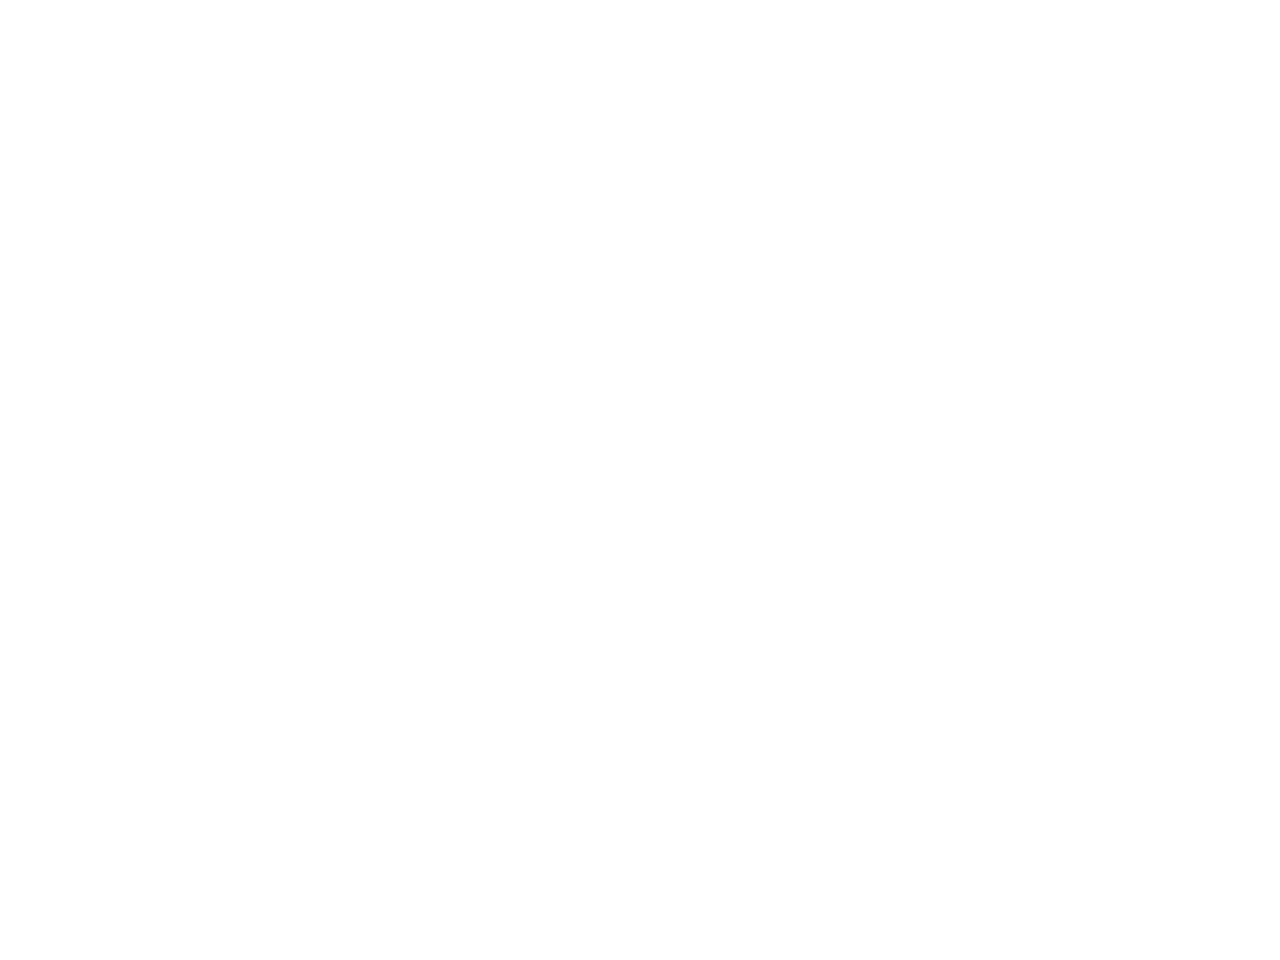

In [13]:

fig, axs=plt.subplots(2,2)

axs[0,0].plot(sol.t,sol.y[0]*180/pi)
axs[0,1].plot(sol.t,sol_approx.y[0]*180/pi,'tab:orange')
#ax.plot(sol.t,sol.y[3])
#ax.plot(sol_approx.t,sol_approx.y[0])
#plt.grid(True)
#legend = ax.legend()
#ax2=fig.add_subplot(12)
axs[1,0].plot(sol.y[0],sol.y[1])
axs[1,0].set_aspect(4)
axs[1,1].plot(sol_approx.y[0],sol_approx.y[1],'tab:orange')
axs[1,1].set_aspect(4)

axs[1,0].grid(True)
#legend = ax.legend()

plt.show()

Phase portrait

In [14]:
def deriv_phase_portrait(t,y):
    return    [y[1],-1*sin(y[0])]
    

<IPython.core.display.Javascript object>


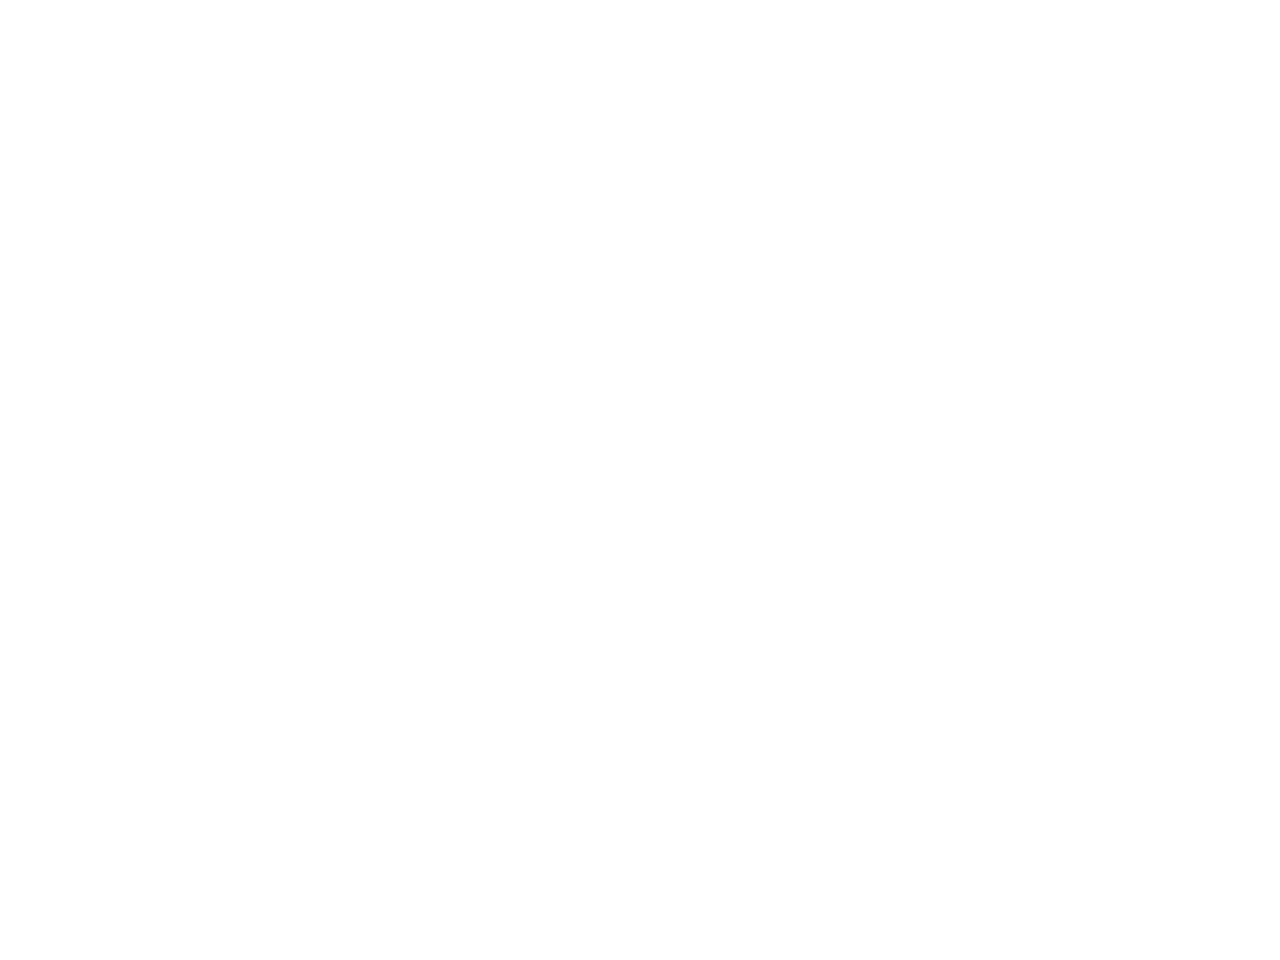

In [15]:
%matplotlib notebook
from ipywidgets import *

min_t=0
max_t=70
init_vals=[160*pi/180,0] #inital angular postition and velocity
t=np.linspace(min_t,max_t,2000) # time period of interest

inital_positions=np.linspace(0,1*pi,13)

fig,ax = plt.subplots()

for theta in inital_positions:
    sol = integrate.solve_ivp(deriv_phase_portrait,[min_t,max_t],[theta,0],t_eval=t)
    ax.plot(sol.y[0]%(2*pi),sol.y[1],'.')

<IPython.core.display.Javascript object>


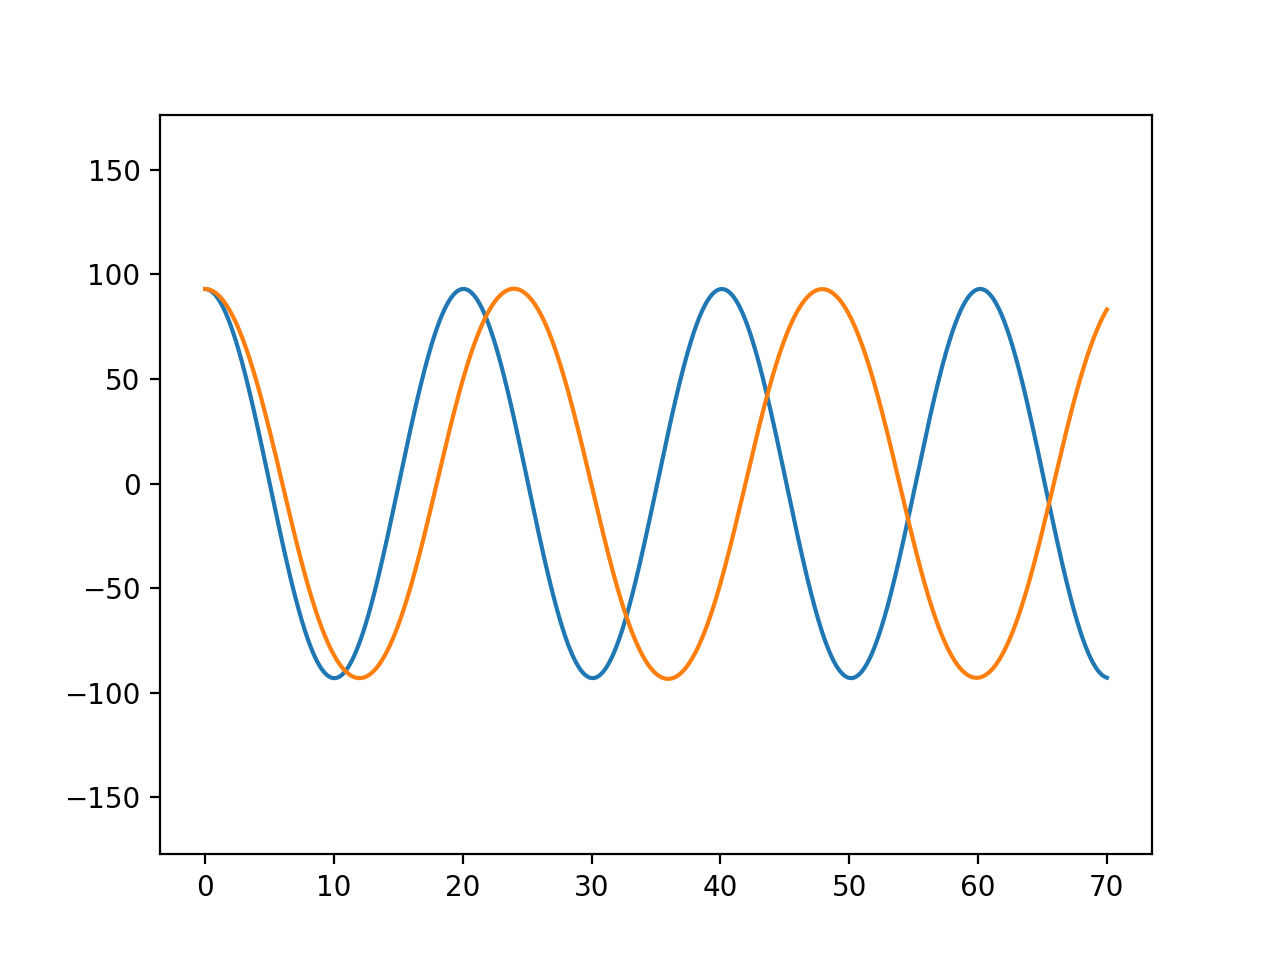

interactive(children=(IntSlider(value=90, description='inital_angle', max=270, min=-90), Output()), _dom_class…

In [21]:
%matplotlib notebook
from ipywidgets import *

min_t=0
max_t=70
init_vals=[160*pi/180,0] #inital angular postition and velocity
t=np.linspace(min_t,max_t,2000) # time period of interest


sol = integrate.solve_ivp(deriv_ivp,[min_t,max_t],init_vals,t_eval=t)
sol_approx=integrate.solve_ivp(deriv_ivp_approx,[min_t,max_t],init_vals,t_eval=t)

fig,axs = plt.subplots()

line1,=axs.plot(sol.t,sol.y[0]*180/pi)
line2,=axs.plot(sol_approx.t,sol_approx.y[0]*180/pi)


def update(inital_angle = 90):
    radians=inital_angle*pi/180
    sol_update = integrate.solve_ivp(deriv_ivp,[min_t,max_t],[radians,0],t_eval=t)
    sol_approx_update = integrate.solve_ivp(deriv_ivp_approx,[min_t,max_t],[radians,0],t_eval=t)
    line1.set_ydata(sol_update.y[0]*(180/pi))
    line2.set_ydata(sol_approx_update.y[0]*(180/pi))

    fig.canvas.draw_idle()

interact(update,initial_angle=(-179,179));

<IPython.core.display.Javascript object>


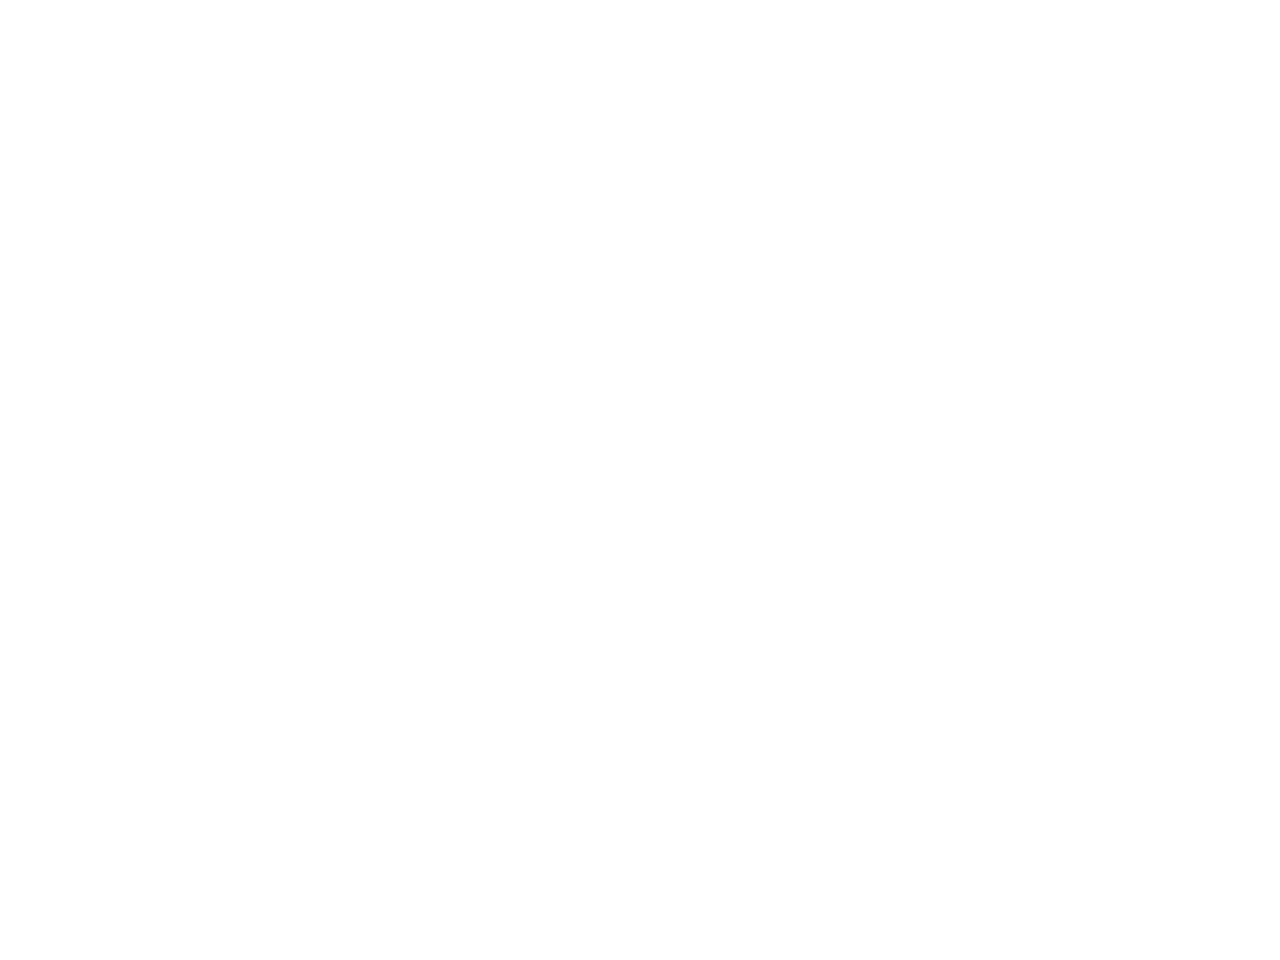

In [17]:
%matplotlib notebook


min_t=0
max_t=70
init_vals=[160*pi/180,1] #inital angular postition and velocity
t=np.linspace(min_t,max_t,2000) # time period of interest


sol = integrate.solve_ivp(deriv_ivp,[min_t,max_t],init_vals,t_eval=t)
sol_approx=integrate.solve_ivp(deriv_ivp_approx,[min_t,max_t],init_vals,t_eval=t)

fig,axs = plt.subplots()

line1,=axs.plot(sol.y[0],sol.y[1])
line2,=axs.plot(sol_approx.y[0],sol_approx.y[1])


def update(inital_angle = 90, inital_speed=0):
    radians=inital_angle*pi/180
    angular_speed = initial_speed*pi/180
    
    sol_update = integrate.solve_ivp(deriv_ivp,[min_t,max_t],[radians,initial_speed],t_eval=t)
    sol_approx_update = integrate.solve_ivp(deriv_ivp_approx,[min_t,max_t],[radians,initial_speed],t_eval=t)
    line1.set_ydata(sol_update.y[1])
    line1.set_xdata(sol_update.y[0])
    
    line2.set_ydata(sol_approx_update.y[1])
    line2.set_xdata(sol_approx_update.y[0])

    fig.canvas.draw_idle()

interactive(update,inital_angle=(-179,179),initial_speed=(-2,2));

In [18]:
help(interact)

Help on _InteractFactory in module ipywidgets.widgets.interaction object:

class _InteractFactory(builtins.object)
 |  _InteractFactory(cls, options, kwargs={})
 |  
 |  Factory for instances of :class:`interactive`.
 |  
 |  This class is needed to support options like::
 |  
 |      >>> @interact.options(manual=True)
 |      ... def greeting(text="World"):
 |      ...     print("Hello {}".format(text))
 |  
 |  Parameters
 |  ----------
 |  cls : class
 |      The subclass of :class:`interactive` to construct.
 |  options : dict
 |      A dict of options used to construct the interactive
 |      function. By default, this is returned by
 |      ``cls.default_options()``.
 |  kwargs : dict
 |      A dict of **kwargs to use for widgets.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, _InteractFactory__interact_f=None, **kwargs)
 |      Make the given function interactive by adding and displaying
 |      the corresponding :class:`interactive` widget.
 |      
 |      Expects the 

In [19]:


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

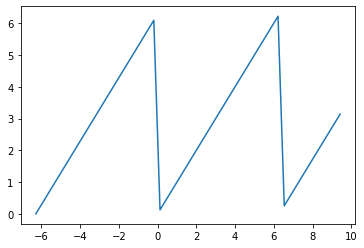

In [20]:
x=np.linspace(-2*pi,3*pi)
fig,ax = plt.subplots()
ax.plot(x,x%(2*pi))
   